In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
from datetime import datetime
from collections import Counter
import re

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

%matplotlib inline

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
data_path = '../data/processed/merged_health_data.csv'

df = pd.read_csv(data_path)

print("="*60)
print("DATA LOADED SUCCESSFULLY")
print("="*60)
print(f"Total Records: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")
print(f"\nColumn Names:")
print(df.columns.tolist())

DATA LOADED SUCCESSFULLY
Total Records: 19,080
Total Columns: 10

Column Names:
['id', 'title', 'text', 'created_utc', 'score', 'num_comments', 'subreddit', 'category', 'health_category', 'source_file']


In [4]:
print("="*60)
print("DATASET OVERVIEW")
print("="*60)

print("\nFirst 5 Rows:")
print(df.head())

print("\n" + "="*60)
print("Data Types:")
print(df.dtypes)

print("\n" + "="*60)
print("Dataset Shape:", df.shape)
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

DATASET OVERVIEW

First 5 Rows:
        id                                              title  \
0  1qan9dz                                Diabetes and wounds   
1  1qan06o                                      T1D in Movies   
2  1qakrrm                                            Patches   
3  1qaipk4  Accidental double dose of Jardiance today (10m...   
4  1qaggi1                       Silly question, but curious?   

                                                text   created_utc  score  \
0  35. M. I've been a bad diabetic for a while, a...  1.768198e+09      1   
1  Curious, for the movie buffs on the sub, what ...  1.768197e+09      1   
2  Hi, I'm caring for someone who has very fragil...  1.768191e+09      1   
3  Hey all. My Mother called me a bit ago pretty ...  1.768185e+09      2   
4  So I am on insulin injections, I am wondering ...  1.768179e+09      1   

   num_comments subreddit  category health_category   source_file  
0             0  diabetes  diabetes        dia

In [5]:
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✅ No missing values found!")

plt.figure(figsize=(10, 6))
if len(missing_df) > 0:
    plt.barh(missing_df['Column'], missing_df['Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.savefig('../reports/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\n(No visualization needed - no missing values)")

MISSING VALUES ANALYSIS
✅ No missing values found!

(No visualization needed - no missing values)


<Figure size 1000x600 with 0 Axes>

HEALTH CATEGORY DISTRIBUTION
         Category  Count  Percentage
          fitness   2892   15.157233
             diet   2876   15.073375
    substance_use   2769   14.512579
            sleep   2768   14.507338
    mental_health   2716   14.234801
         diabetes   2535   13.286164
weight_management   2524   13.228512


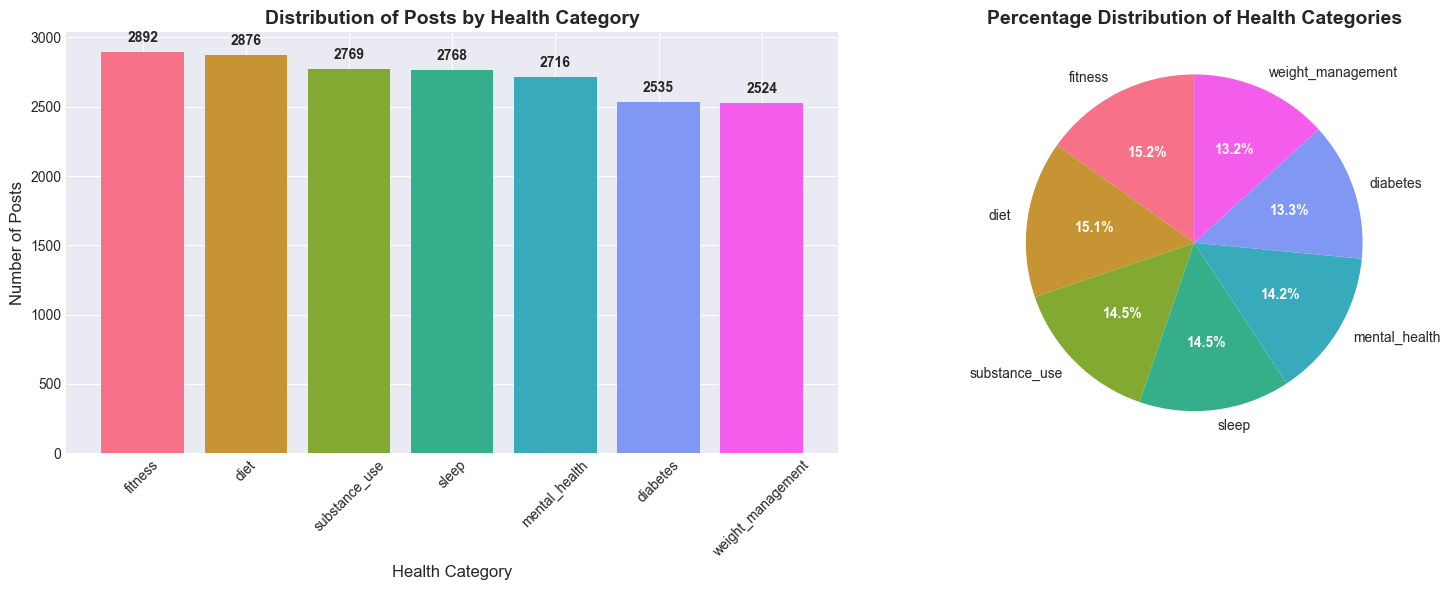

In [6]:
print("="*60)
print("HEALTH CATEGORY DISTRIBUTION")
print("="*60)

category_counts = df['health_category'].value_counts()
category_percentages = (category_counts / len(df)) * 100

category_df = pd.DataFrame({
    'Category': category_counts.index,
    'Count': category_counts.values,
    'Percentage': category_percentages.values
})

print(category_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(category_counts.index, category_counts.values, color=sns.color_palette("husl", len(category_counts)))
axes[0].set_xlabel('Health Category', fontsize=12)
axes[0].set_ylabel('Number of Posts', fontsize=12)
axes[0].set_title('Distribution of Posts by Health Category', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(category_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

colors = sns.color_palette("husl", len(category_counts))
wedges, texts, autotexts = axes[1].pie(category_counts.values, labels=category_counts.index, 
                                         autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Percentage Distribution of Health Categories', fontsize=14, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.savefig('../reports/category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

TEXT LENGTH ANALYSIS

Overall Statistics:
  Mean text length: 811.97 characters
  Median text length: 576.00 characters
  Max text length: 21,613 characters
  Min text length: 51 characters

  Mean word count: 145.43 words
  Median word count: 105.00 words

Text Length by Health Category:
                  text_length        word_count       
                         mean median       mean median
health_category                                       
diabetes               705.75  496.0     131.82   93.0
diet                   593.80  428.5     107.32   78.0
fitness                996.99  769.0     160.07  118.0
mental_health          928.77  594.5     166.67  110.0
sleep                  826.98  598.0     152.85  111.0
substance_use          816.49  599.0     154.49  113.0
weight_management      808.15  624.0     144.76  118.0


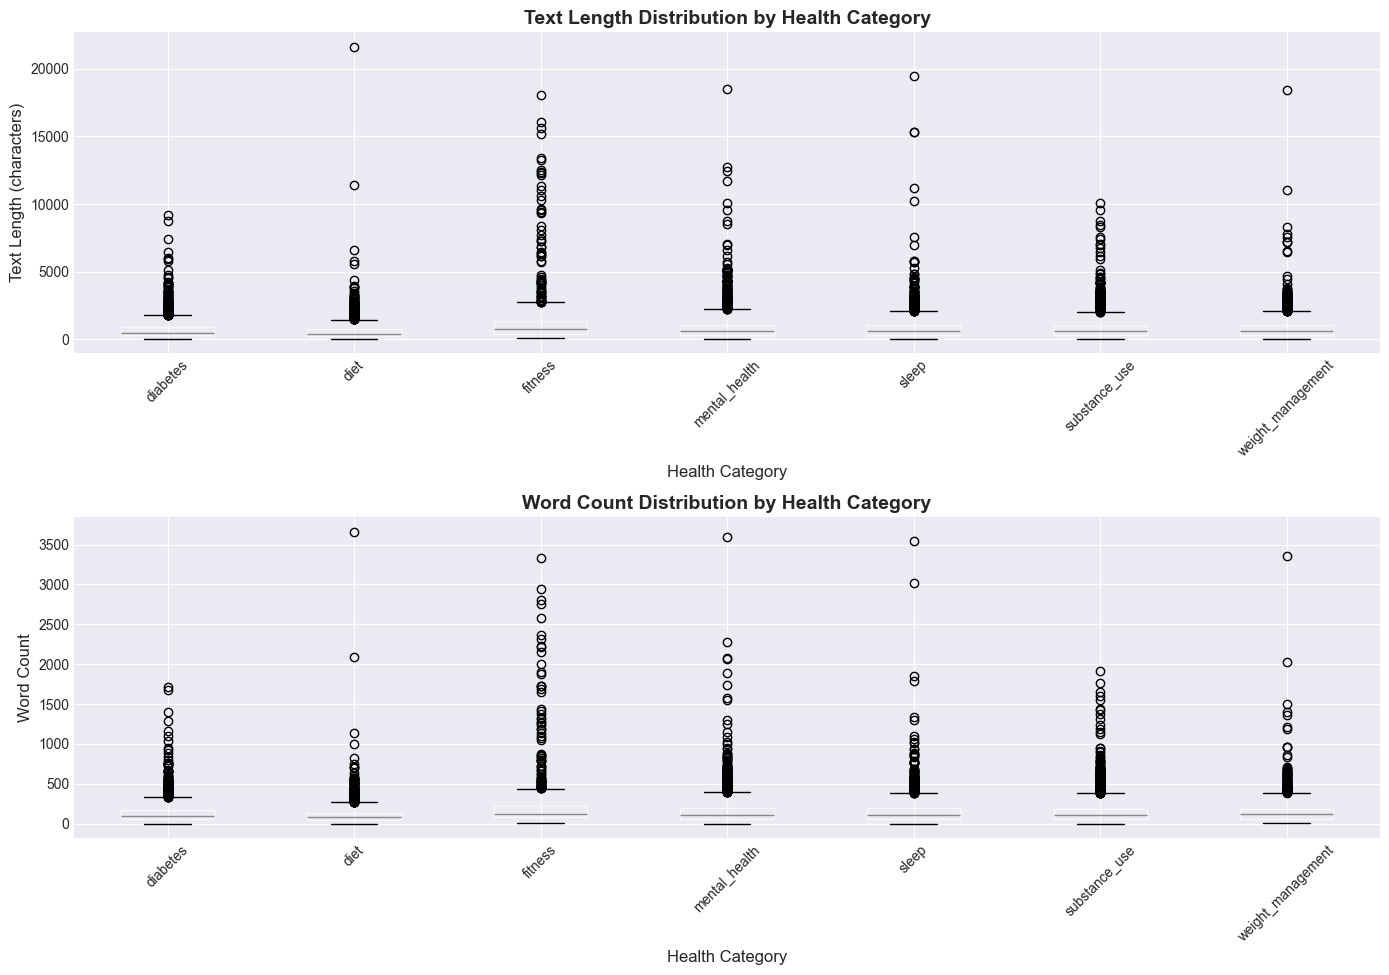

In [7]:
print("="*60)
print("TEXT LENGTH ANALYSIS")
print("="*60)

df['text_length'] = df['text'].fillna('').astype(str).apply(len)
df['word_count'] = df['text'].fillna('').astype(str).apply(lambda x: len(x.split()))

print("\nOverall Statistics:")
print(f"  Mean text length: {df['text_length'].mean():.2f} characters")
print(f"  Median text length: {df['text_length'].median():.2f} characters")
print(f"  Max text length: {df['text_length'].max():,} characters")
print(f"  Min text length: {df['text_length'].min()} characters")

print(f"\n  Mean word count: {df['word_count'].mean():.2f} words")
print(f"  Median word count: {df['word_count'].median():.2f} words")

print("\n" + "="*60)
print("Text Length by Health Category:")
print("="*60)

category_text_stats = df.groupby('health_category').agg({
    'text_length': ['mean', 'median'],
    'word_count': ['mean', 'median']
}).round(2)

print(category_text_stats)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

df.boxplot(column='text_length', by='health_category', ax=axes[0])
axes[0].set_xlabel('Health Category', fontsize=12)
axes[0].set_ylabel('Text Length (characters)', fontsize=12)
axes[0].set_title('Text Length Distribution by Health Category', fontsize=14, fontweight='bold')
axes[0].get_figure().suptitle('')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

df.boxplot(column='word_count', by='health_category', ax=axes[1])
axes[1].set_xlabel('Health Category', fontsize=12)
axes[1].set_ylabel('Word Count', fontsize=12)
axes[1].set_title('Word Count Distribution by Health Category', fontsize=14, fontweight='bold')
axes[1].get_figure().suptitle('')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.savefig('../reports/text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

ENGAGEMENT METRICS ANALYSIS

Overall Score Statistics:
  Mean score: 36.15
  Median score: 7.00
  Max score: 10866
  Min score: 0

Score Distribution:
  Low engagement (score 1-5): 8,773 posts (46.0%)
  Medium engagement (score 6-50): 7,936 posts (41.6%)
  High engagement (score > 50): 2,371 posts (12.4%)

Average Score by Health Category:
                    mean  median    max
health_category                        
diabetes           16.43     5.0    719
diet               51.05    12.0  10866
fitness            38.12    13.0   8243
mental_health      32.52     7.0   2058
sleep               5.91     2.0    469
substance_use      31.04     7.0   3955
weight_management  79.35     7.0   4490


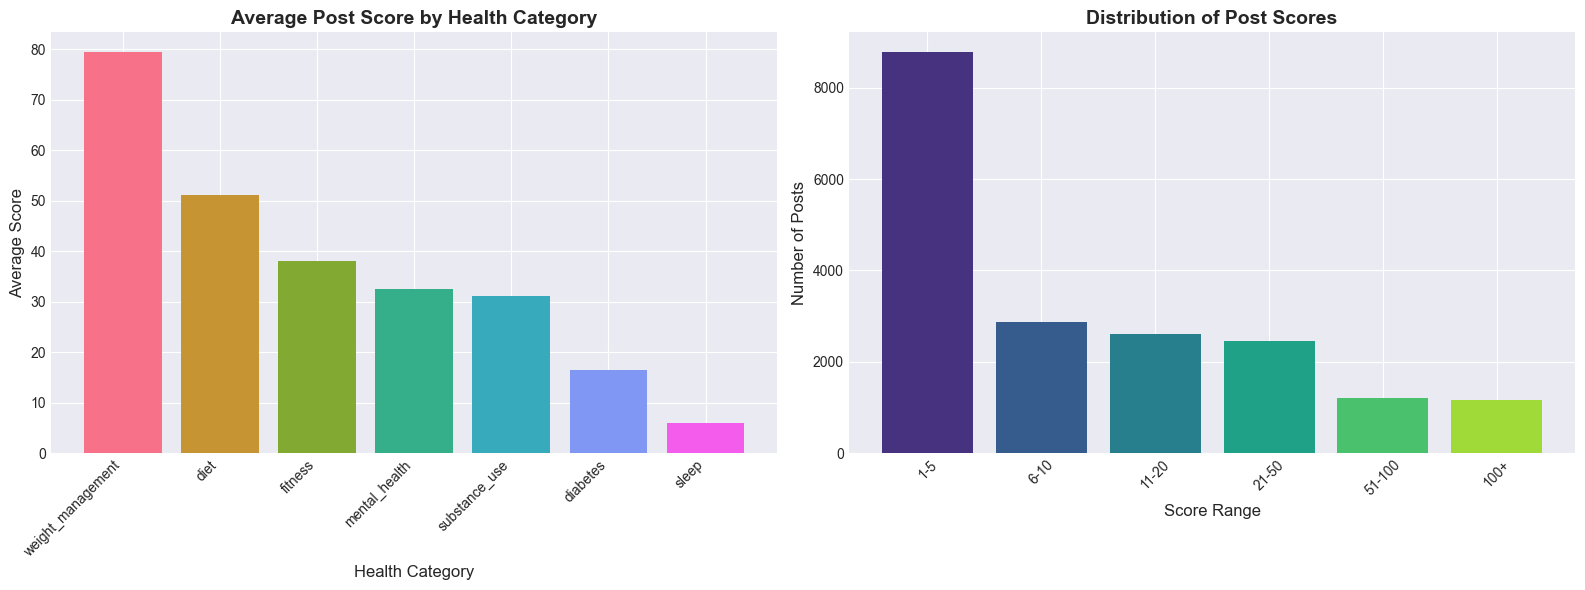

In [8]:
print("="*60)
print("ENGAGEMENT METRICS ANALYSIS")
print("="*60)

print("\nOverall Score Statistics:")
print(f"  Mean score: {df['score'].mean():.2f}")
print(f"  Median score: {df['score'].median():.2f}")
print(f"  Max score: {df['score'].max()}")
print(f"  Min score: {df['score'].min()}")

print("\nScore Distribution:")
print(f"  Low engagement (score 1-5): {len(df[df['score'] <= 5]):,} posts ({len(df[df['score'] <= 5])/len(df)*100:.1f}%)")
print(f"  Medium engagement (score 6-50): {len(df[(df['score'] > 5) & (df['score'] <= 50)]):,} posts ({len(df[(df['score'] > 5) & (df['score'] <= 50)])/len(df)*100:.1f}%)")
print(f"  High engagement (score > 50): {len(df[df['score'] > 50]):,} posts ({len(df[df['score'] > 50])/len(df)*100:.1f}%)")

print("\n" + "="*60)
print("Average Score by Health Category:")
print("="*60)

category_scores = df.groupby('health_category')['score'].agg(['mean', 'median', 'max']).round(2)
print(category_scores)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

avg_scores = df.groupby('health_category')['score'].mean().sort_values(ascending=False)
axes[0].bar(range(len(avg_scores)), avg_scores.values, color=sns.color_palette("husl", len(avg_scores)))
axes[0].set_xticks(range(len(avg_scores)))
axes[0].set_xticklabels(avg_scores.index, rotation=45, ha='right')
axes[0].set_xlabel('Health Category', fontsize=12)
axes[0].set_ylabel('Average Score', fontsize=12)
axes[0].set_title('Average Post Score by Health Category', fontsize=14, fontweight='bold')

score_bins = [0, 5, 10, 20, 50, 100, df['score'].max()]
score_labels = ['1-5', '6-10', '11-20', '21-50', '51-100', '100+']
df['score_range'] = pd.cut(df['score'], bins=score_bins, labels=score_labels, include_lowest=True)
score_dist = df['score_range'].value_counts().sort_index()

axes[1].bar(range(len(score_dist)), score_dist.values, color=sns.color_palette("viridis", len(score_dist)))
axes[1].set_xticks(range(len(score_dist)))
axes[1].set_xticklabels(score_dist.index, rotation=45)
axes[1].set_xlabel('Score Range', fontsize=12)
axes[1].set_ylabel('Number of Posts', fontsize=12)
axes[1].set_title('Distribution of Post Scores', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/engagement_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

TEMPORAL ANALYSIS

Date Range:
  Earliest post: 2023-04-07 18:44:44
  Latest post: 2026-01-12 06:15:02
  Time span: 1010 days


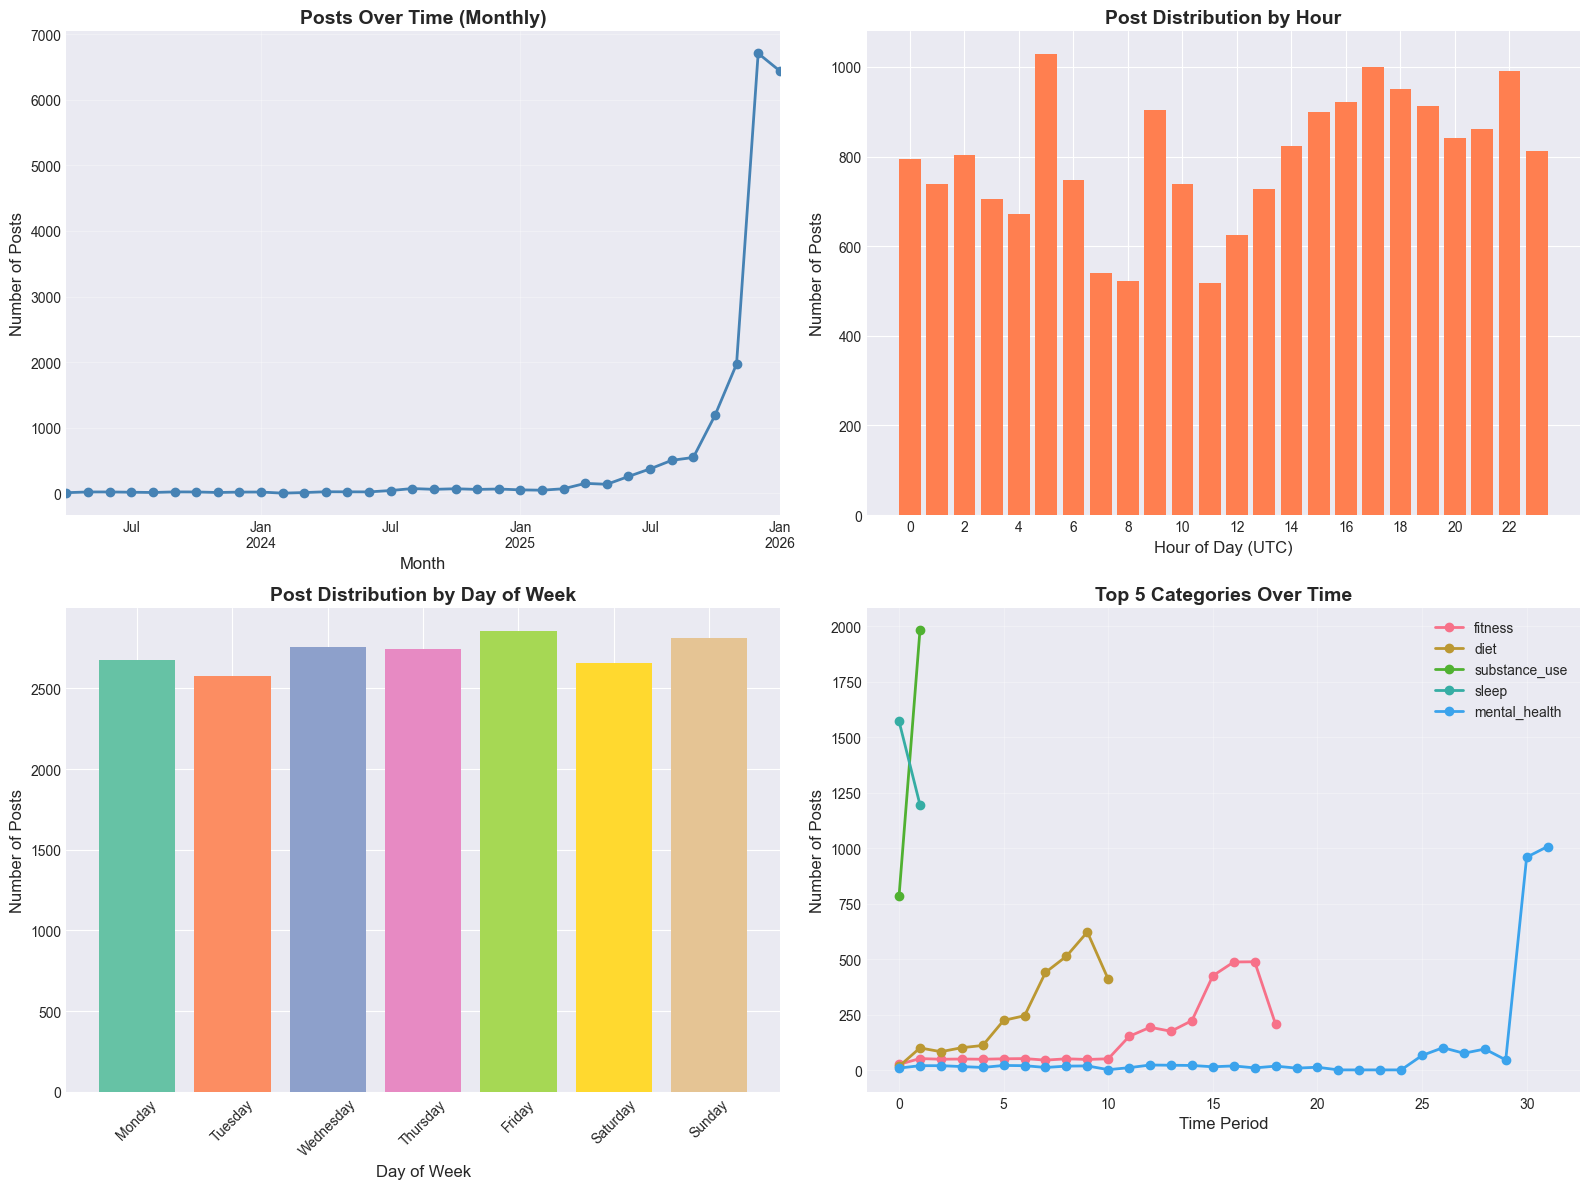

In [9]:
print("="*60)
print("TEMPORAL ANALYSIS")
print("="*60)

df['created_datetime'] = pd.to_datetime(df['created_utc'], unit='s')
df['date'] = df['created_datetime'].dt.date
df['year_month'] = df['created_datetime'].dt.to_period('M')
df['hour'] = df['created_datetime'].dt.hour
df['day_of_week'] = df['created_datetime'].dt.day_name()

print(f"\nDate Range:")
print(f"  Earliest post: {df['created_datetime'].min()}")
print(f"  Latest post: {df['created_datetime'].max()}")
print(f"  Time span: {(df['created_datetime'].max() - df['created_datetime'].min()).days} days")

posts_per_month = df['year_month'].value_counts().sort_index()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

posts_per_month.plot(kind='line', marker='o', ax=axes[0, 0], color='steelblue', linewidth=2)
axes[0, 0].set_xlabel('Month', fontsize=12)
axes[0, 0].set_ylabel('Number of Posts', fontsize=12)
axes[0, 0].set_title('Posts Over Time (Monthly)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

hour_dist = df['hour'].value_counts().sort_index()
axes[0, 1].bar(hour_dist.index, hour_dist.values, color='coral')
axes[0, 1].set_xlabel('Hour of Day (UTC)', fontsize=12)
axes[0, 1].set_ylabel('Number of Posts', fontsize=12)
axes[0, 1].set_title('Post Distribution by Hour', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(range(0, 24, 2))

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_dist = df['day_of_week'].value_counts().reindex(day_order)
axes[1, 0].bar(range(len(day_dist)), day_dist.values, color=sns.color_palette("Set2", 7))
axes[1, 0].set_xticks(range(len(day_dist)))
axes[1, 0].set_xticklabels(day_dist.index, rotation=45)
axes[1, 0].set_xlabel('Day of Week', fontsize=12)
axes[1, 0].set_ylabel('Number of Posts', fontsize=12)
axes[1, 0].set_title('Post Distribution by Day of Week', fontsize=14, fontweight='bold')

top_5_categories = df['health_category'].value_counts().head(5).index
filtered_df = df[df['health_category'].isin(top_5_categories)]
for category in top_5_categories:
    category_data = filtered_df[filtered_df['health_category'] == category]
    monthly_counts = category_data['year_month'].value_counts().sort_index()
    axes[1, 1].plot(range(len(monthly_counts)), monthly_counts.values, marker='o', label=category, linewidth=2)

axes[1, 1].set_xlabel('Time Period', fontsize=12)
axes[1, 1].set_ylabel('Number of Posts', fontsize=12)
axes[1, 1].set_title('Top 5 Categories Over Time', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

GENERATING OVERALL WORD CLOUD


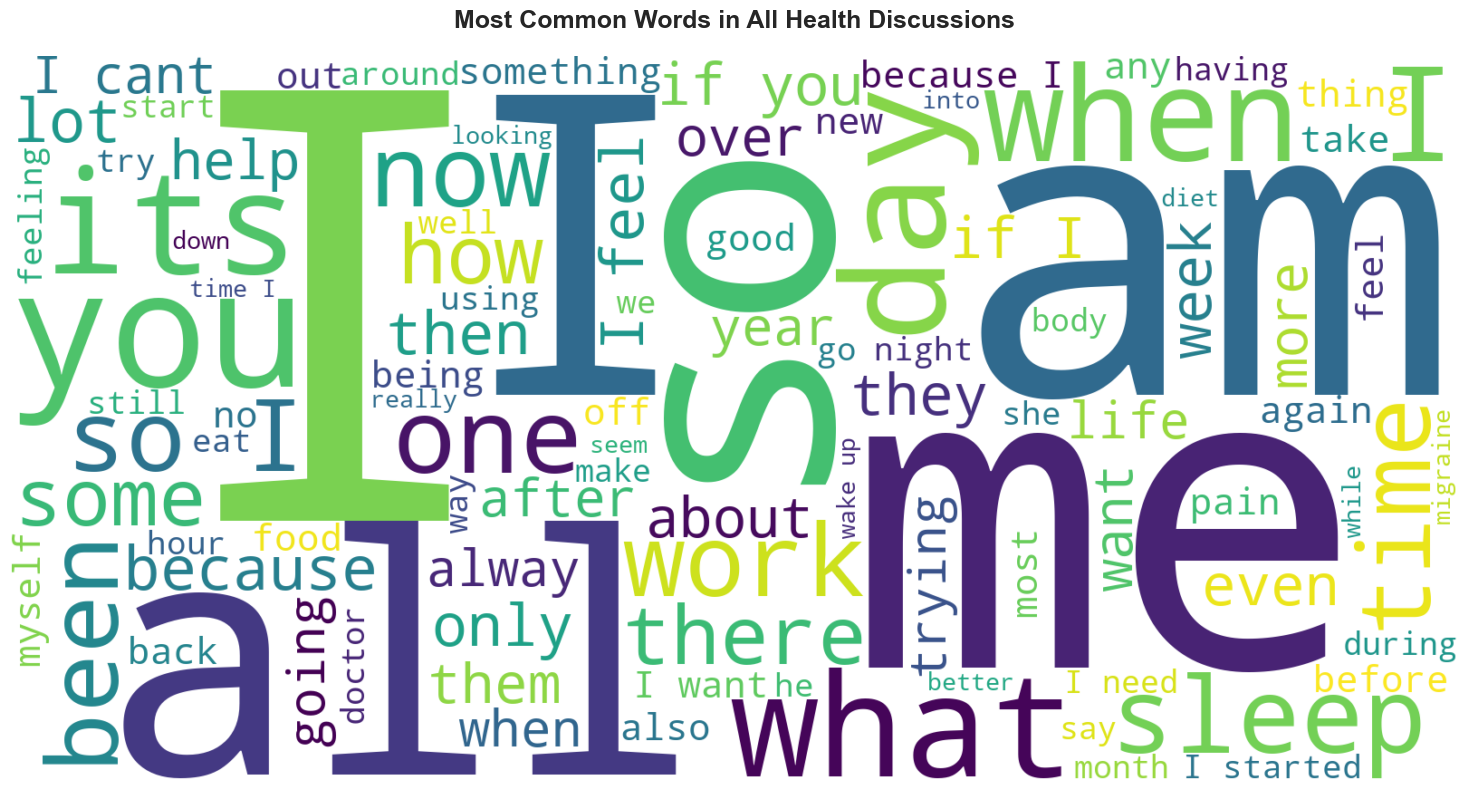

✅ Overall word cloud generated!


In [10]:
print("="*60)
print("GENERATING OVERALL WORD CLOUD")
print("="*60)

all_text = ' '.join(df['text'].fillna('').astype(str))

all_text = re.sub(r'http\S+|www\S+|https\S+', '', all_text, flags=re.MULTILINE)
all_text = re.sub(r'\[deleted\]|\[removed\]', '', all_text)
all_text = re.sub(r'[^a-zA-Z\s]', '', all_text)

stopwords_custom = set(['the', 'and', 'to', 'of', 'a', 'in', 'is', 'it', 'that', 'for', 'on', 'with', 'as', 
                        'was', 'at', 'by', 'an', 'be', 'this', 'which', 'or', 'from', 'but', 'not', 'are',
                        'my', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should',
                        'can', 'just', 'like', 'get', 'got', 'im', 'ive', 'dont', 'know', 'think'])

wordcloud = WordCloud(width=1600, height=800, background_color='white', 
                     stopwords=stopwords_custom, max_words=100, 
                     colormap='viridis', relative_scaling=0.5).generate(all_text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in All Health Discussions', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/wordcloud_overall.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Overall word cloud generated!")

GENERATING WORD CLOUDS BY CATEGORY
✅ Generated word cloud for: diabetes
✅ Generated word cloud for: diet
✅ Generated word cloud for: fitness
✅ Generated word cloud for: mental_health
✅ Generated word cloud for: sleep
✅ Generated word cloud for: substance_use
✅ Generated word cloud for: weight_management


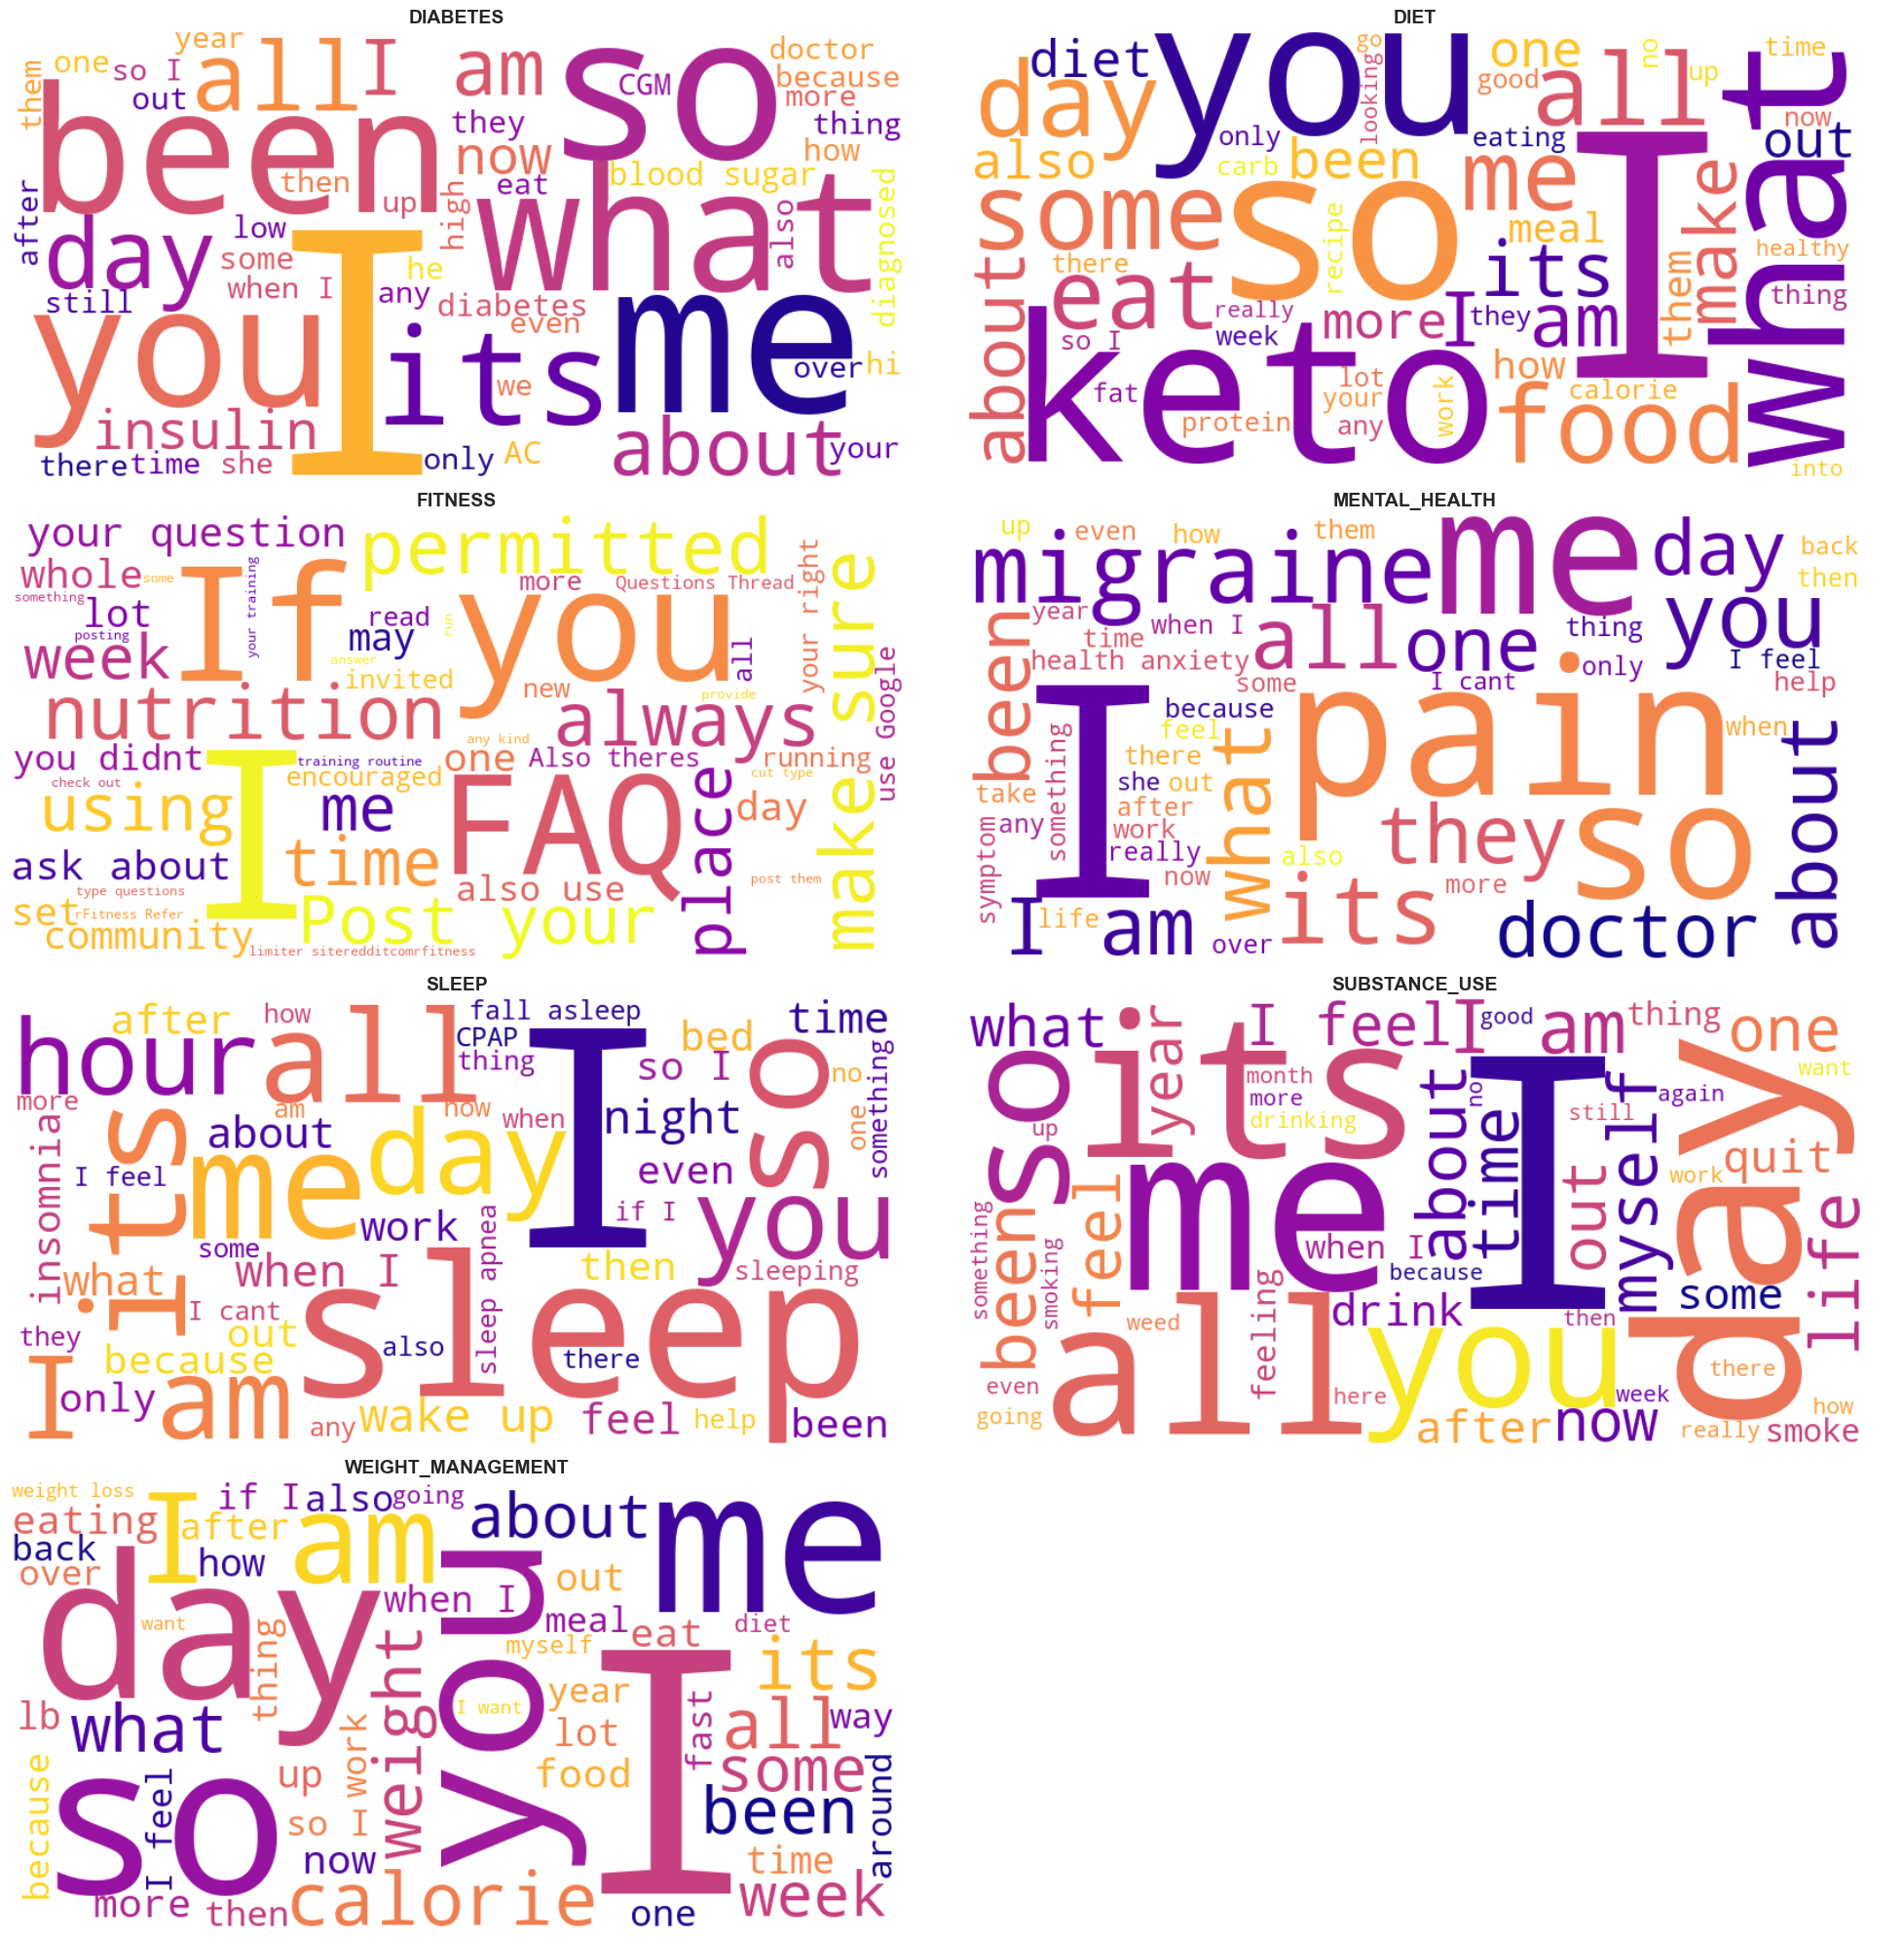


✅ All category word clouds generated!


In [11]:
print("="*60)
print("GENERATING WORD CLOUDS BY CATEGORY")
print("="*60)

categories = df['health_category'].unique()
n_categories = len(categories)

rows = (n_categories + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(20, 5 * rows))
axes = axes.flatten()

for idx, category in enumerate(categories):
    category_text = ' '.join(df[df['health_category'] == category]['text'].fillna('').astype(str))
    
    category_text = re.sub(r'http\S+|www\S+|https\S+', '', category_text, flags=re.MULTILINE)
    category_text = re.sub(r'\[deleted\]|\[removed\]', '', category_text)
    category_text = re.sub(r'[^a-zA-Z\s]', '', category_text)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                         stopwords=stopwords_custom, max_words=50,
                         colormap='plasma').generate(category_text)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f'{category.upper()}', fontsize=14, fontweight='bold')
    
    print(f"✅ Generated word cloud for: {category}")

for idx in range(n_categories, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('../reports/wordcloud_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ All category word clouds generated!")

In [12]:
print("="*60)
print("TOP WORDS ANALYSIS BY CATEGORY")
print("="*60)

def get_top_words(text, n=20):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\[deleted\]|\[removed\]', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    
    words = text.split()
    words = [w for w in words if w not in stopwords_custom and len(w) > 3]
    
    word_counts = Counter(words)
    return word_counts.most_common(n)

for category in df['health_category'].unique():
    category_text = ' '.join(df[df['health_category'] == category]['text'].fillna('').astype(str))
    top_words = get_top_words(category_text, 15)
    
    print(f"\n{category.upper()}:")
    print("-" * 60)
    for word, count in top_words:
        print(f"  {word:20s}: {count:5,}")

TOP WORDS ANALYSIS BY CATEGORY

DIABETES:
------------------------------------------------------------
  been                : 1,605
  what                : 1,238
  about               : 1,227
  sugar               : 1,085
  blood               : 1,061
  insulin             : 1,058
  when                : 1,033
  diabetes            :   928
  after               :   882
  because             :   858
  time                :   795
  they                :   790
  some                :   750
  more                :   743
  also                :   718

DIET:
------------------------------------------------------------
  keto                : 1,613
  some                : 1,338
  what                : 1,245
  about               : 1,059
  been                : 1,049
  more                :   937
  protein             :   929
  food                :   792
  diet                :   761
  also                :   741
  eating              :   738
  weight              :   708
  when             

SUBREDDIT ANALYSIS

Top 15 Subreddits:
subreddit
running                1000
insomnia                996
keto                    992
bodyweightfitness       985
leaves                  964
stopdrinking            959
EatCheapAndHealthy      956
sleep                   948
migraine                945
loseit                  945
HealthAnxiety           933
nutrition               928
Fitness                 907
diabetes_t2             880
intermittentfasting     847
Name: count, dtype: int64


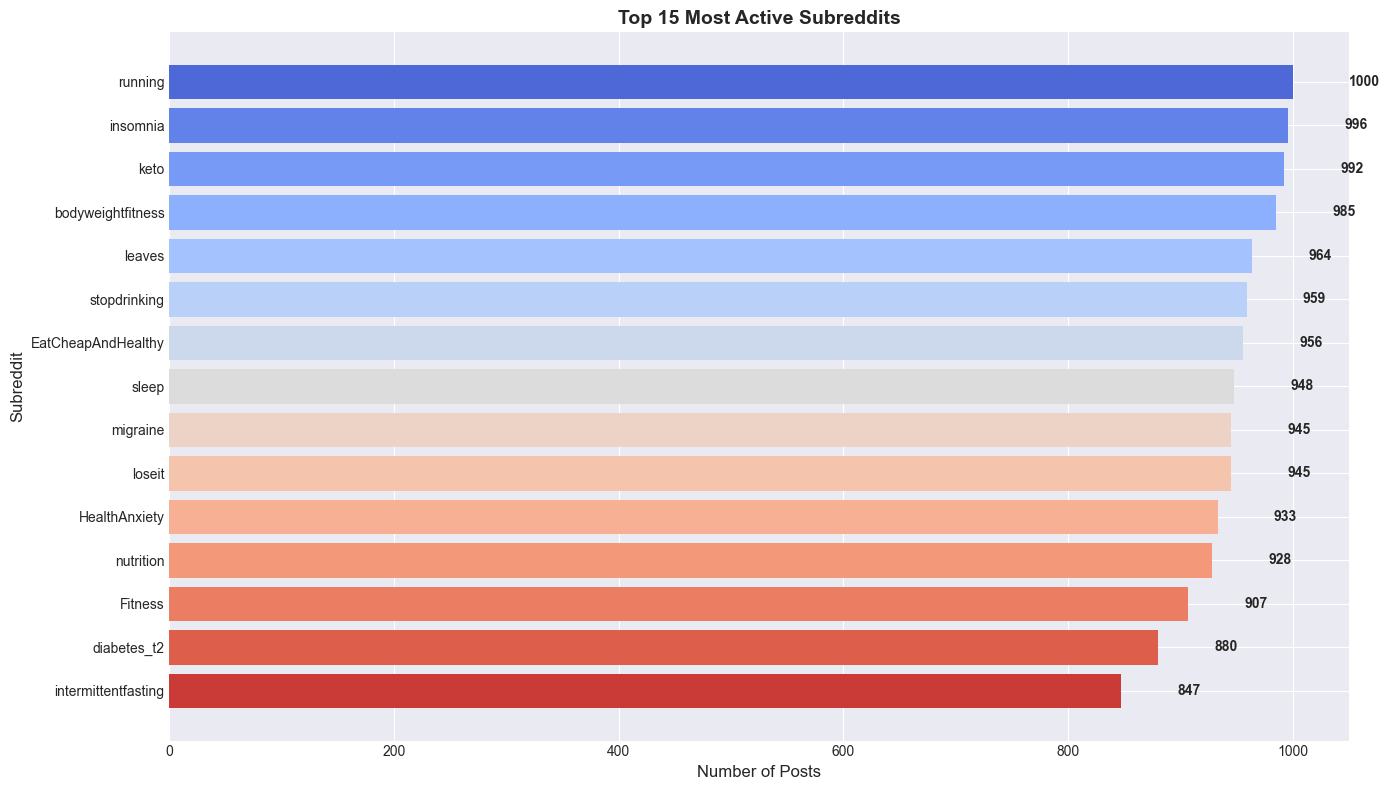

In [13]:
print("="*60)
print("SUBREDDIT ANALYSIS")
print("="*60)

if 'subreddit' in df.columns:
    subreddit_counts = df['subreddit'].value_counts().head(15)
    
    print("\nTop 15 Subreddits:")
    print(subreddit_counts)
    
    plt.figure(figsize=(14, 8))
    plt.barh(range(len(subreddit_counts)), subreddit_counts.values, color=sns.color_palette("coolwarm", len(subreddit_counts)))
    plt.yticks(range(len(subreddit_counts)), subreddit_counts.index)
    plt.xlabel('Number of Posts', fontsize=12)
    plt.ylabel('Subreddit', fontsize=12)
    plt.title('Top 15 Most Active Subreddits', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    for i, v in enumerate(subreddit_counts.values):
        plt.text(v + 50, i, str(v), va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../reports/subreddit_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("⚠️ 'subreddit' column not found in dataset")

In [14]:
print("="*80)
print(" " * 25 + "EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*80)

print("\n📊 DATASET OVERVIEW:")
print("-" * 80)
print(f"  Total Posts: {len(df):,}")
print(f"  Total Categories: {df['health_category'].nunique()}")
print(f"  Date Range: {df['created_datetime'].min().date()} to {df['created_datetime'].max().date()}")
print(f"  Time Span: {(df['created_datetime'].max() - df['created_datetime'].min()).days} days")

print("\n📈 CATEGORY DISTRIBUTION:")
print("-" * 80)
for category, count in df['health_category'].value_counts().items():
    percentage = (count / len(df)) * 100
    print(f"  {category:25s}: {count:6,} posts ({percentage:5.2f}%)")

print("\n📝 TEXT STATISTICS:")
print("-" * 80)
print(f"  Average text length: {df['text_length'].mean():.0f} characters")
print(f"  Average word count: {df['word_count'].mean():.0f} words")
print(f"  Median text length: {df['text_length'].median():.0f} characters")
print(f"  Median word count: {df['word_count'].median():.0f} words")

print("\n💬 ENGAGEMENT METRICS:")
print("-" * 80)
print(f"  Average score: {df['score'].mean():.2f}")
print(f"  Median score: {df['score'].median():.2f}")
print(f"  Highest score: {df['score'].max()}")
print(f"  Low engagement posts (score ≤ 5): {len(df[df['score'] <= 5]):,} ({len(df[df['score'] <= 5])/len(df)*100:.1f}%)")
print(f"  High engagement posts (score > 50): {len(df[df['score'] > 50]):,} ({len(df[df['score'] > 50])/len(df)*100:.1f}%)")

if 'subreddit' in df.columns:
    print("\n🌐 SUBREDDIT STATISTICS:")
    print("-" * 80)
    print(f"  Total unique subreddits: {df['subreddit'].nunique()}")
    print(f"  Most active subreddit: {df['subreddit'].value_counts().index[0]} ({df['subreddit'].value_counts().values[0]:,} posts)")

print("\n📁 OUTPUT FILES GENERATED:")
print("-" * 80)
print("  ✅ missing_values.png")
print("  ✅ category_distribution.png")
print("  ✅ text_length_analysis.png")
print("  ✅ engagement_analysis.png")
print("  ✅ temporal_analysis.png")
print("  ✅ wordcloud_overall.png")
print("  ✅ wordcloud_by_category.png")
print("  ✅ subreddit_distribution.png")

print("\n" + "="*80)
print(" " * 30 + "EDA COMPLETED SUCCESSFULLY! ✅")
print("="*80)

                         EXPLORATORY DATA ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
--------------------------------------------------------------------------------
  Total Posts: 19,080
  Total Categories: 7
  Date Range: 2023-04-07 to 2026-01-12
  Time Span: 1010 days

📈 CATEGORY DISTRIBUTION:
--------------------------------------------------------------------------------
  fitness                  :  2,892 posts (15.16%)
  diet                     :  2,876 posts (15.07%)
  substance_use            :  2,769 posts (14.51%)
  sleep                    :  2,768 posts (14.51%)
  mental_health            :  2,716 posts (14.23%)
  diabetes                 :  2,535 posts (13.29%)
  weight_management        :  2,524 posts (13.23%)

📝 TEXT STATISTICS:
--------------------------------------------------------------------------------
  Average text length: 812 characters
  Average word count: 145 words
  Median text length: 576 characters
  Median word count: 105 words

💬 ENGAGEMENT METRICS:
-------

In [15]:
print("="*60)
print("SAVING PROCESSED DATA WITH NEW FEATURES")
print("="*60)

output_columns = ['id', 'title', 'text', 'created_utc', 'score', 'num_comments', 
                  'subreddit', 'health_category', 'text_length', 'word_count', 
                  'created_datetime', 'date', 'hour', 'day_of_week']

available_columns = [col for col in output_columns if col in df.columns]

df_output = df[available_columns]

output_path = '../data/processed/eda_processed_data.csv'
df_output.to_csv(output_path, index=False)

print(f"✅ Processed data saved to: {output_path}")
print(f"   Shape: {df_output.shape}")
print(f"   Columns: {list(df_output.columns)}")

SAVING PROCESSED DATA WITH NEW FEATURES
✅ Processed data saved to: ../data/processed/eda_processed_data.csv
   Shape: (19080, 14)
   Columns: ['id', 'title', 'text', 'created_utc', 'score', 'num_comments', 'subreddit', 'health_category', 'text_length', 'word_count', 'created_datetime', 'date', 'hour', 'day_of_week']
